# Visualization basics with Matplotlib, Pandas and Seaborn
## Demo: Visualizing Energy Efficiency
    
### Imports

In [1]:
%matplotlib inline
import os
import requests
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Use the `requests` library to fetch the data 

In [2]:
ENERGY = "http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

In [3]:
def download_data(url, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    name = os.path.basename(url)
    with open(os.path.join(path, name), 'w') as f:
        f.write(response.content)

In [4]:
download_data(ENERGY)

### `Pandas` 

Pandas, which you've already been experimenting with so far this semester, is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python programmers and data scientists.


#### Load data into a dataframe

In [5]:
energy   = pd.read_excel('data/ENB2012_data.xlsx', sep=",")

In [6]:
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28


In [7]:
energy.columns = ['compactness','surface_area','wall_area','roof_area','height',\
                  'orientation','glazing_area','distribution','heating_load','cooling_load']

#### Summary statistics 

In [8]:
energy.describe()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#### Visualization tools

Pandas has a __bunch__ of really useful [visualization tools](http://pandas.pydata.org/pandas-docs/stable/visualization.html). (Hint: They're all Matplotlib under the hood. Most Python viz libraries are wrappers for Matplotlib!)

In [9]:
# We can use the ggplot style with Matplotlib, which is a little bit nicer-looking than the standard style.
matplotlib.style.use('ggplot')

#### Make an area plot

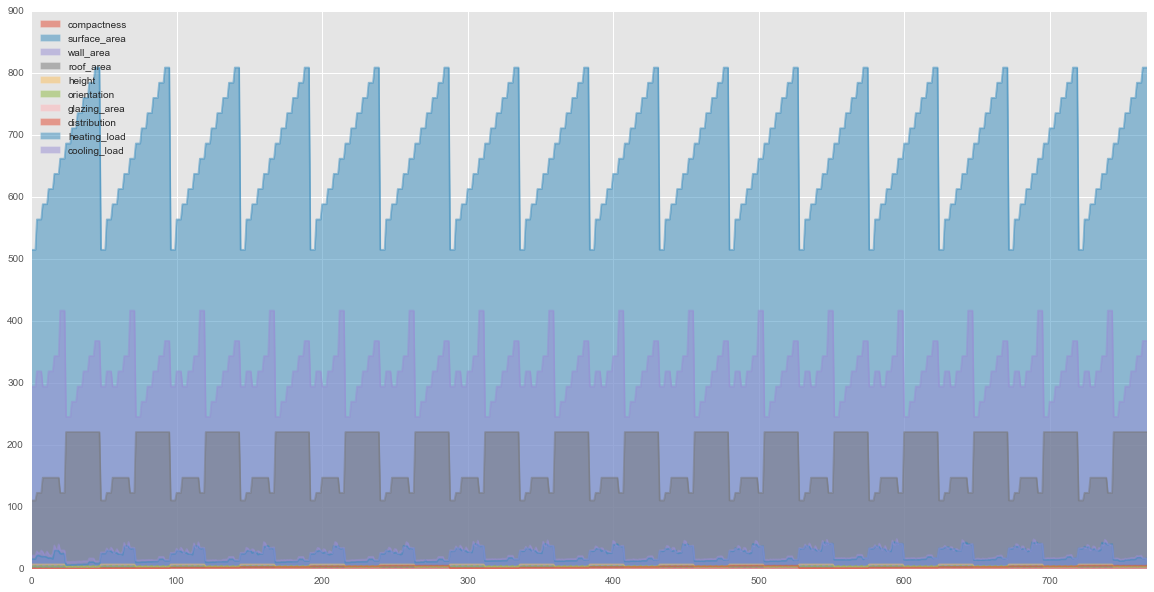

In [10]:
energy.plot(kind='area', stacked=False,figsize=[20,10])

#### Make a scatter plot

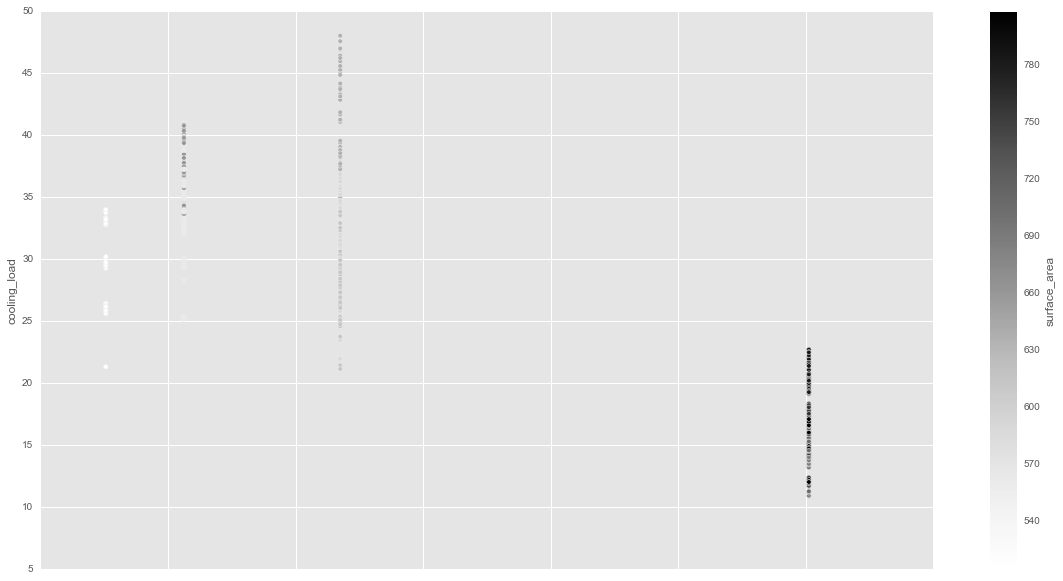

In [11]:
energy.plot(kind='scatter', x='roof_area', y='cooling_load', c='surface_area',figsize=[20,10])

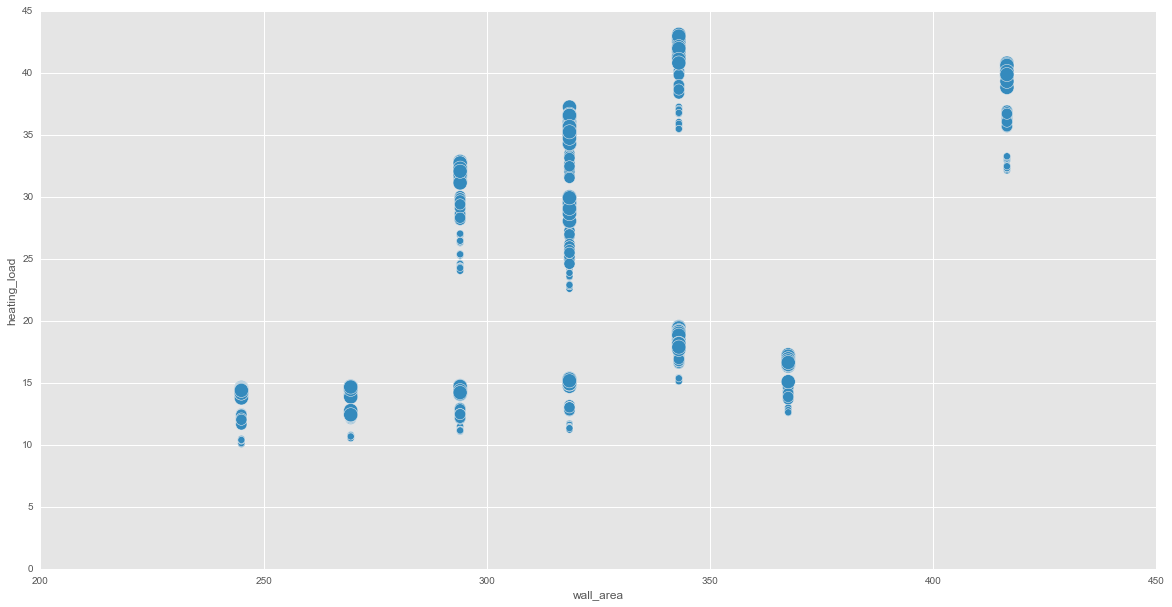

In [12]:
energy.plot(kind='scatter', x='wall_area', y='heating_load', s=energy['glazing_area']*500,figsize=[20,10])

#### Make a box plot

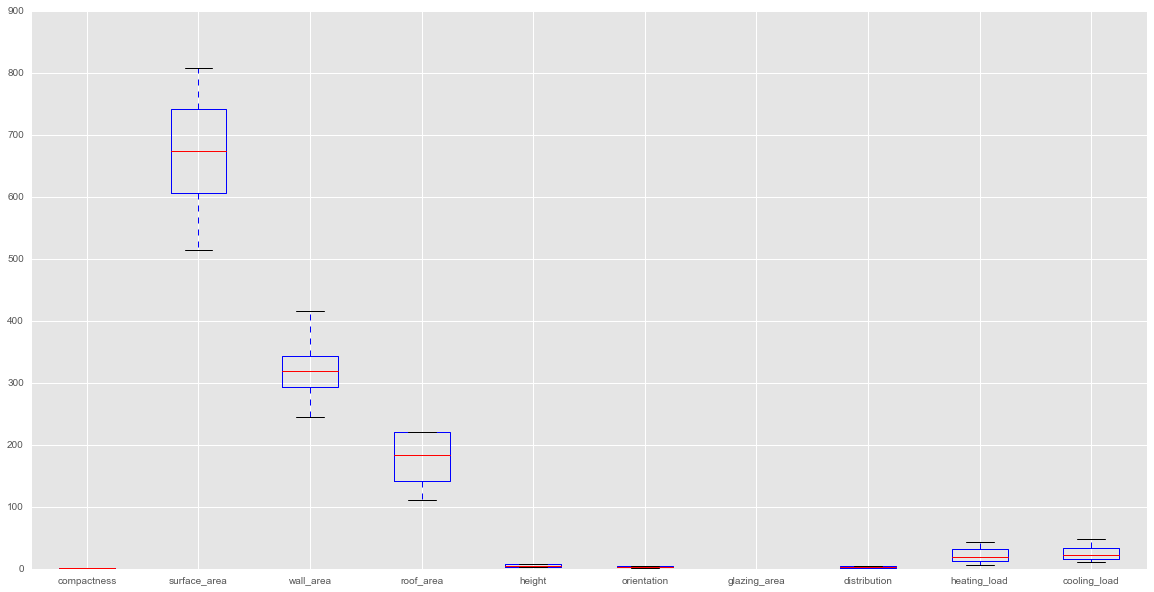

In [13]:
energy.plot(kind='box',figsize=(20,10))

#### Make a histogram

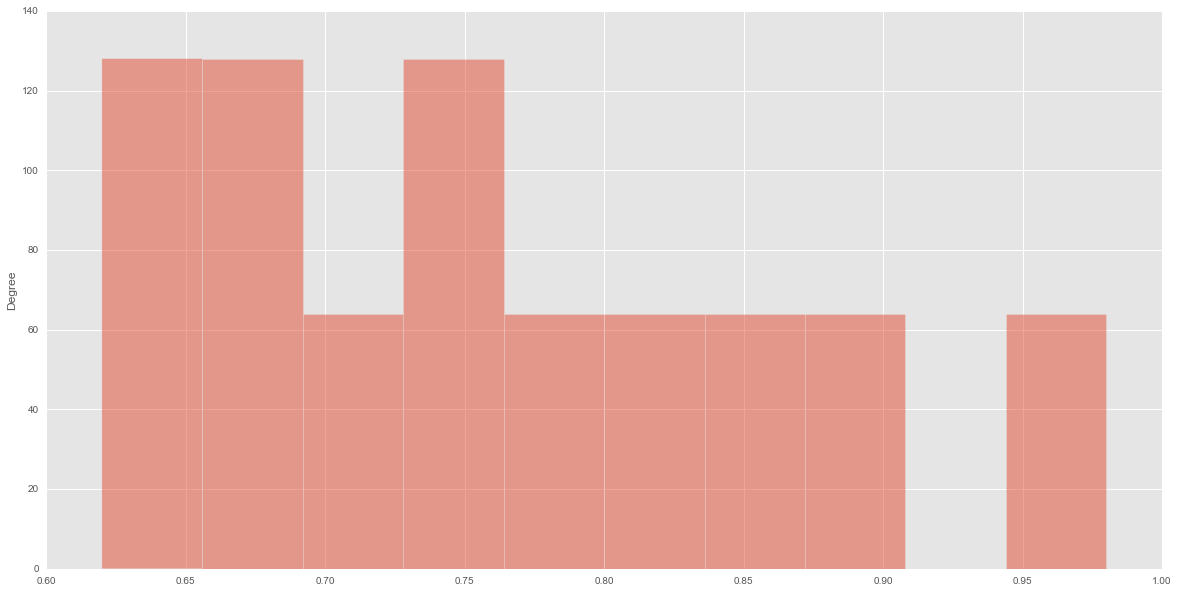

In [14]:
energy['compactness'].plot(kind='hist', alpha=0.5, figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e4555d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f086390>]], dtype=object)

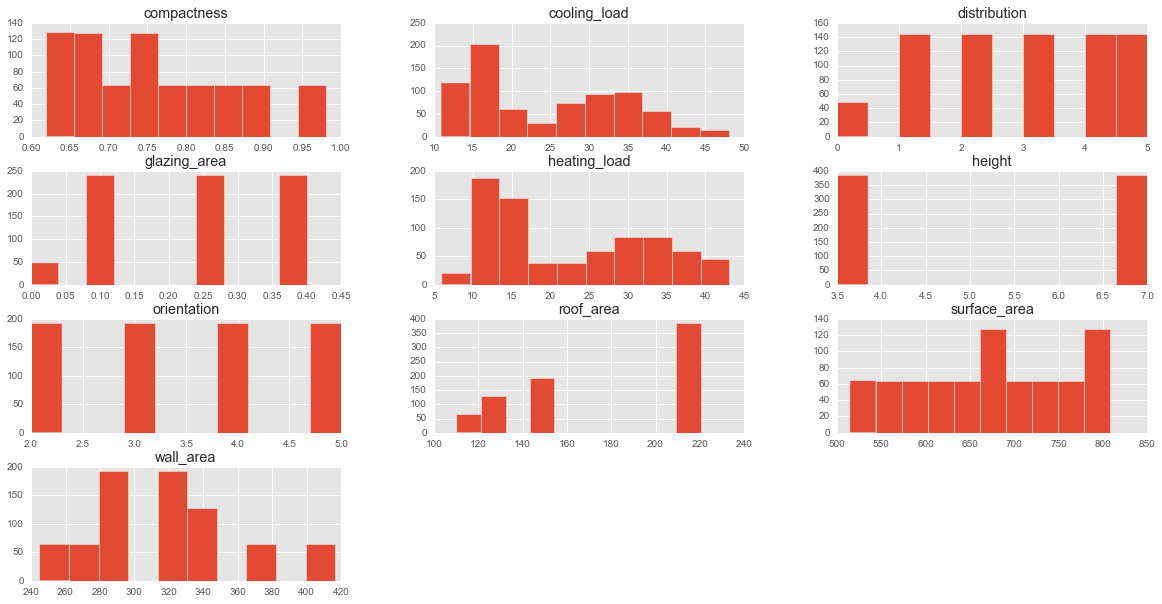

In [15]:
energy.hist(figsize=(20,10))

#### Visualize the distribution with a kernel density estimate

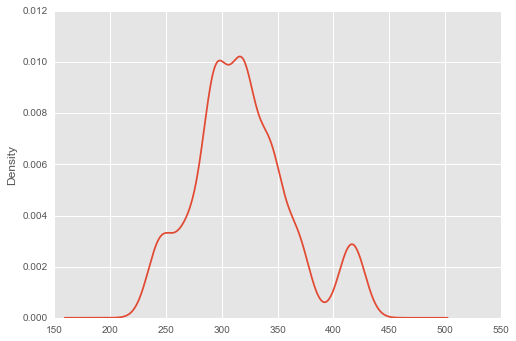

In [16]:
energy['wall_area'].plot(kind='kde')

#### Make a scatter plot matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe6c690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1107df4d0>]], dtype=object)

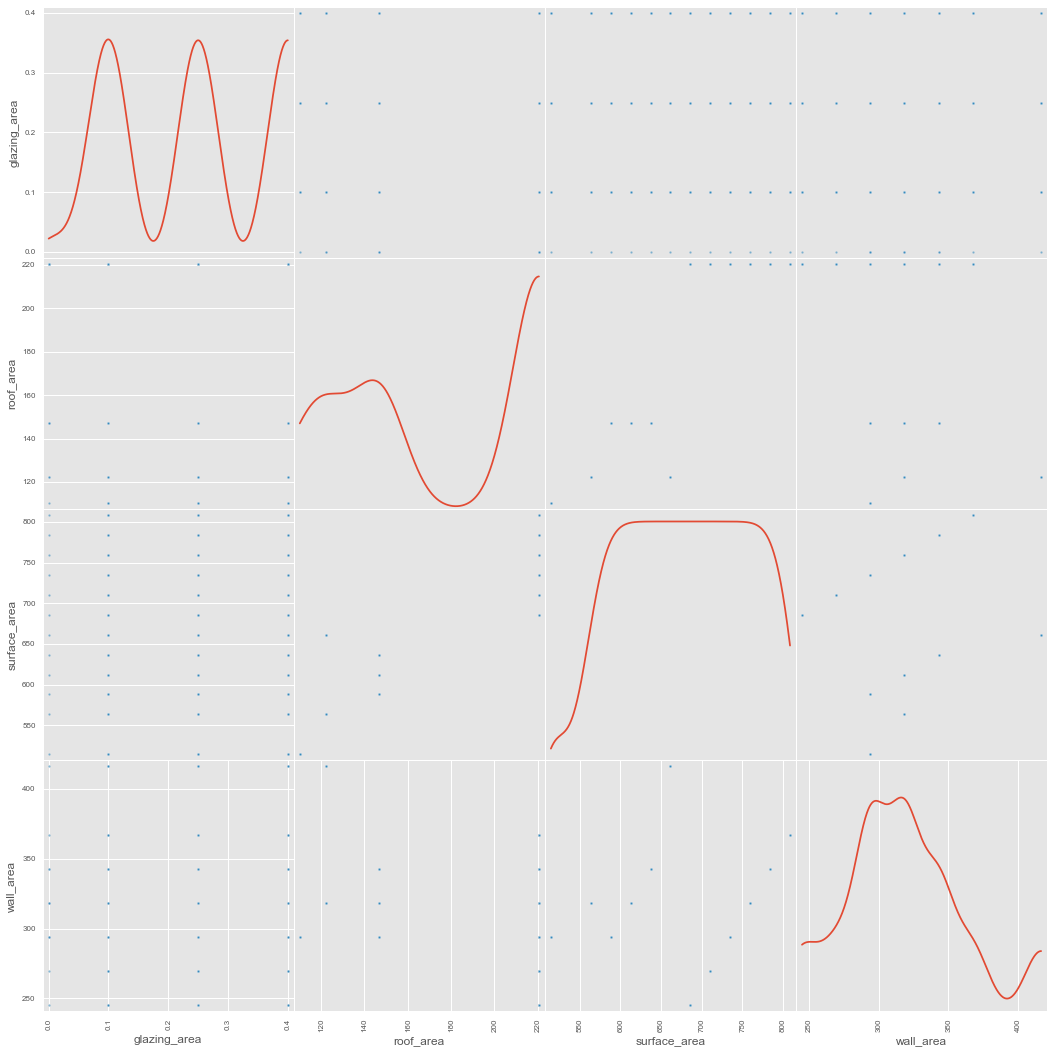

In [17]:
areas = energy[['glazing_area','roof_area','surface_area','wall_area']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Using Matplotlib

Sometimes you'll want to something a bit more custom (or you'll want to figure out how to tweak the labels, change the colors, make small multiples, etc), so you'll want to go straight to the [Matplotlib documentation](http://matplotlib.org/).

Matplotlib is the O.G. visualization library for Python. If you've used MATLAB or Mathematica before, it will immediately start to look familiar.

It produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the Python and iPython shell, web application servers, and six graphical user interface toolkits.

#### Tweak the labels

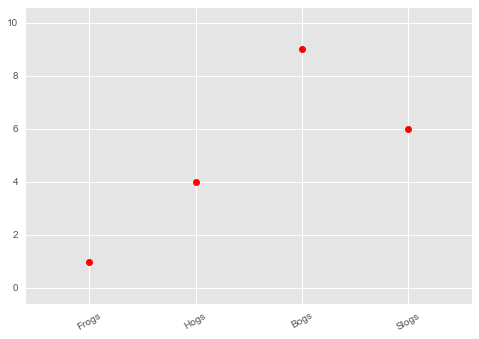

In [18]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation=30)
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

#### Change the colors and make small multiples

See also: [Matplotlib colormaps](http://matplotlib.org/users/colormaps.html)

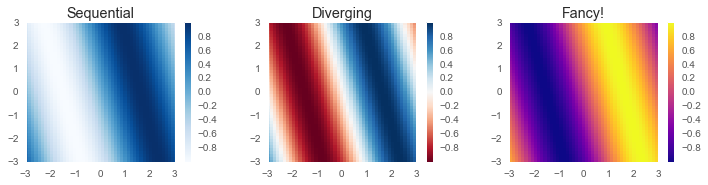

In [19]:
# Make up some fake data
x = np.linspace(-np.pi, np.pi, 50) 
y = np.linspace(-np.pi, np.pi, 50)
X,Y = np.meshgrid(x,y)
Z = np.sin(X + Y/4)

fig = plt.figure(figsize = (12,2.5))
fig.subplots_adjust(wspace=0.3)

# Blues
plt.subplot(1,3,1)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Sequential')

# Red-Blue
plt.subplot(1,3,2)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Diverging')

# Red-Blue
plt.subplot(1,3,3)
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('plasma'))
plt.colorbar()
plt.axis([-3, 3, -3, 3])
plt.title('Fancy!')

### Seaborn

`Seaborn` is another great Python visualization library to have up your sleeve. 

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. For a brief introduction to the ideas behind the package, you can read the introductory notes. More practical information is on the installation page. You may also want to browse the example gallery to get a sense for what you can do with `seaborn` and then check out the tutorial and API reference to find out how.

Seaborn has a lot of the same methods as `Pandas`, like [boxplots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html?highlight=box%20plot#seaborn.boxplot) and [histograms](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html) (albeit with slightly different syntax!), but also comes with some novel tools...

#### Violinplots
[Violinplots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html?highlight=violinplots) are a combination of a boxplot and a kernel density estimate. Very useful for visualizing categorical data!

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


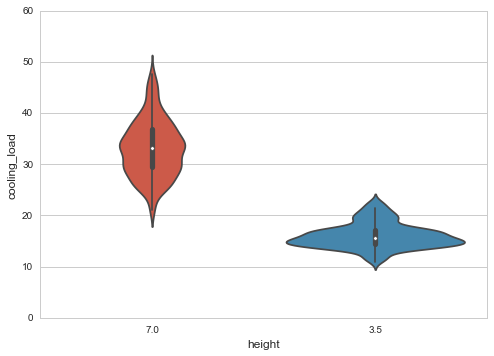

In [20]:
sns.set_style('whitegrid')
sns.violinplot(x='height',y='cooling_load', data=energy)

#### Tools for visualizing linear relationships

See more: https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html

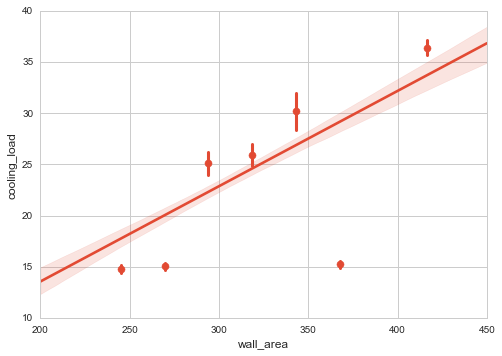

In [21]:
sns.regplot(x='wall_area', y='cooling_load', data=energy, x_estimator=np.mean)

#### FacetGrids for Small Multiples

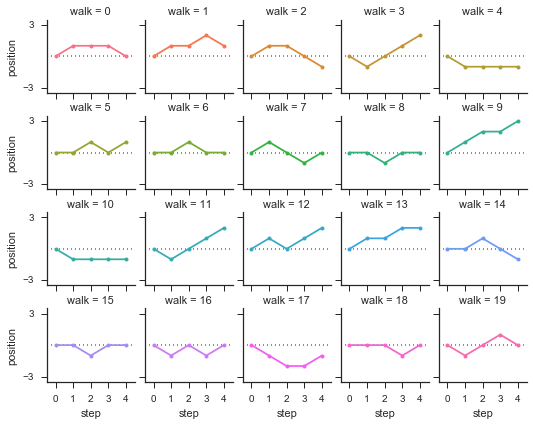

In [22]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#### Heatmaps 
If you have time series data

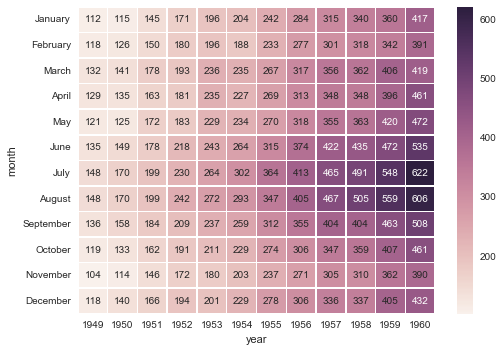

In [23]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot('month', 'year', 'passengers')

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5)

#### Rank-by-feature

To visualize the correlation matrix for your features

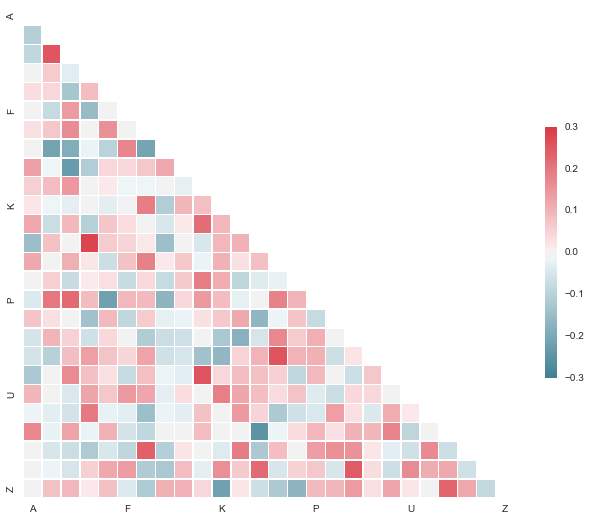

In [24]:
from string import letters
sns.set(style="white")
 
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)